In [1]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random
from copy import copy
import seaborn as sns
sns.set_theme()

# Exercice 11

In [2]:
def binomiale(n, p):
    return sum([(random.random() <= p) for i in range(n)])

In [3]:
[binomiale(30, 0.5) for i in range(10)]

[14, 16, 16, 14, 16, 16, 14, 11, 14, 13]

In [4]:
def convergence_vers_poisson(N, mu, n):
    alea = np.array([binomiale(n, mu/n) for i in range(N)])
    K = math.ceil(3*mu)
    frequences = [np.count_nonzero(alea == i)/N for i in range(0,K+1)] 
    frequences_poisson = [math.exp(-mu) * (mu**i)/math.factorial(i) for i in range(0,K+1)] 
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(range(0,K+1), frequences, width=-0.2, color=sns.color_palette()[0], align="edge")
    ax.bar(range(0,K+1), frequences_poisson, width=0.2, color=sns.color_palette()[1], align="edge")
    ax.set_xlabel("Résultats")
    ax.set_ylabel(f"Fréquences (pour {N} essais)")
    ax.set_title(f"Convergence d'une loi $B(n,{mu}/n)$ (en rouge) vers une loi de Poisson $P({mu})$ (en bleu), ici avec $n={n}$")
    plt.show()

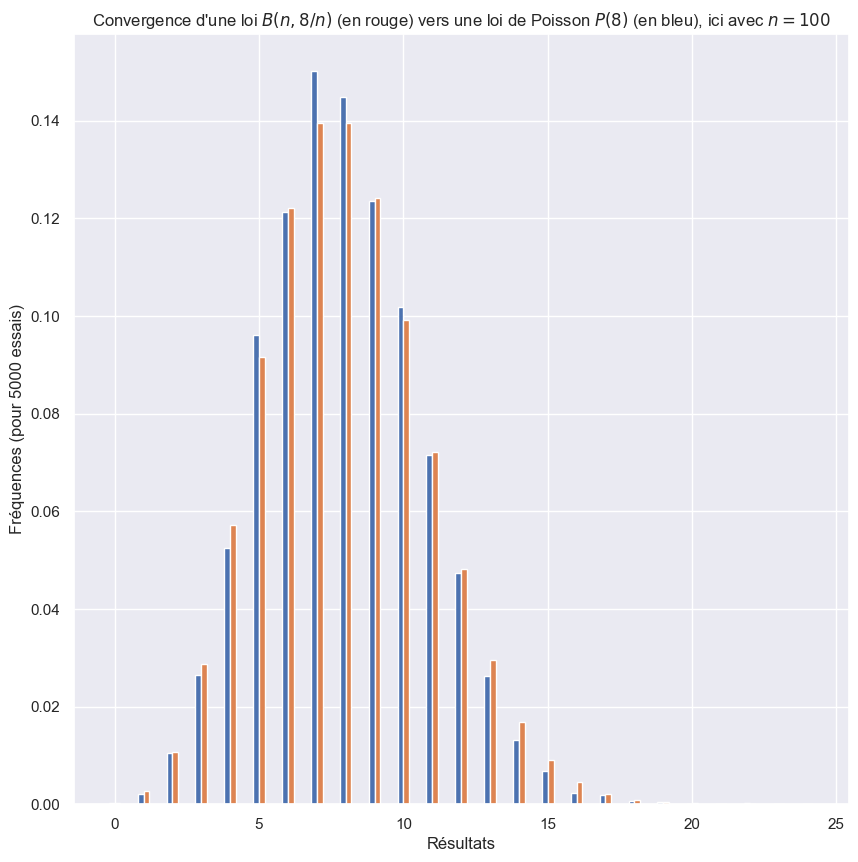

In [5]:
convergence_vers_poisson(5000, 8, 100)

# Exercice 12

In [6]:
def geometrique(p):
    count = 1
    while random.random()>p:
        count += 1
    return count

In [7]:
[geometrique(0.5) for i in range(10)]

[2, 1, 1, 1, 2, 4, 1, 2, 1, 1]

In [8]:
def convergence_vers_geom(N, mu, n):
    alea = np.array([geometrique(mu/n)/n for i in range(N)])
    fig, ax = plt.subplots(figsize=(10,5))
    m = math.ceil(-math.log(0.02)/mu)
    xr = np.linspace(0, m, 500)
    mapf = (lambda x : 1 - np.exp(-mu*x))
    ax.plot(xr, mapf(xr), color="black")
    ax.ecdf(alea)
    ax.set_title(f"Convergence d'une loi $G({mu}/n)/n$ vers une loi géométrique $E({mu})$, ici avec $n={n}$")
    ax.set_xlim([-0.2,m+0.2])
    plt.show()

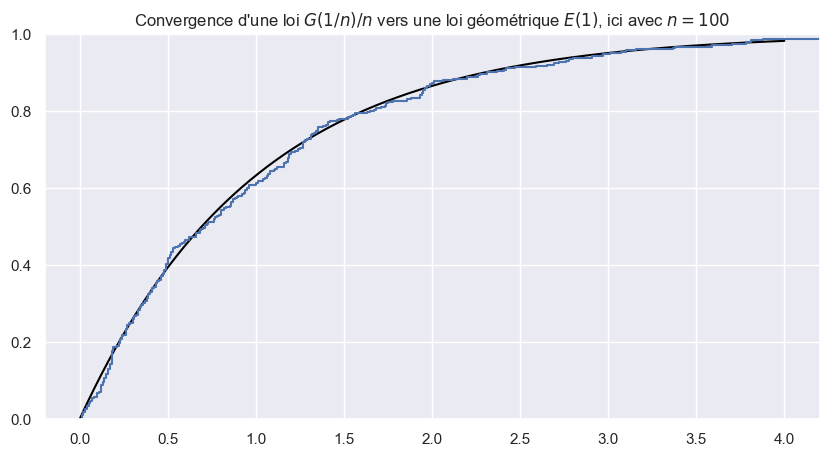

In [10]:
convergence_vers_geom(300, 1, 100)

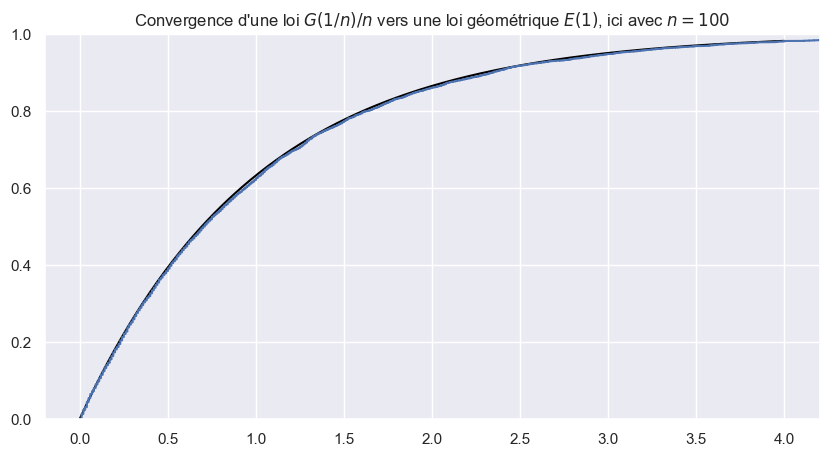

In [11]:
convergence_vers_geom(5000, 1, 100)

# Exercice 13

In [12]:
def exponentielle(mu, size=1):
    mlog = (lambda x : - np.log(x))
    alea = random.random(size)
    return mlog(alea) / mu

In [13]:
exponentielle(1, 10)

array([0.11039454, 0.11554401, 0.07190299, 0.69409692, 3.50976818,
       0.26011348, 0.18160248, 1.15033722, 0.38040954, 2.0652919 ])

In [14]:
def grands_nombres_expo(N, mu):
    alea = exponentielle(mu, N)
    fig, ax = plt.subplots(figsize=(10,10))
    f = np.cumsum(alea) * np.array([1/i for i in range(1,N+1)])
    ax.plot(range(1,N+1), f, color="blue")
    ax.set_xlabel("$n$")
    ax.set_ylabel("$f(n)$ (moyenne empirique)")
    ax.plot([0,N],[1/mu,1/mu], color="black")
    ax.set_xlim([0,N])
    ax.set_title(f"Convergence de la moyenne empirique vers la moyenne théorique (${N}$ réalisations d'une variable exponentielle de paramètre ${mu}$)")
    plt.show()

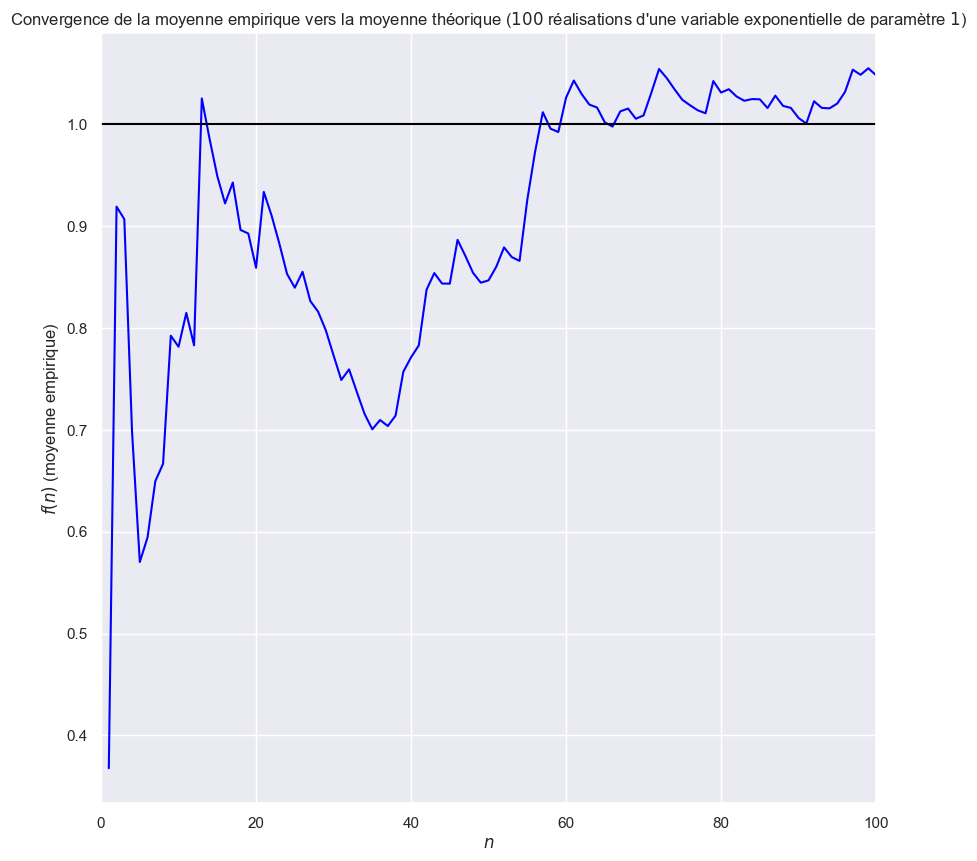

In [17]:
grands_nombres_expo(100, 1)

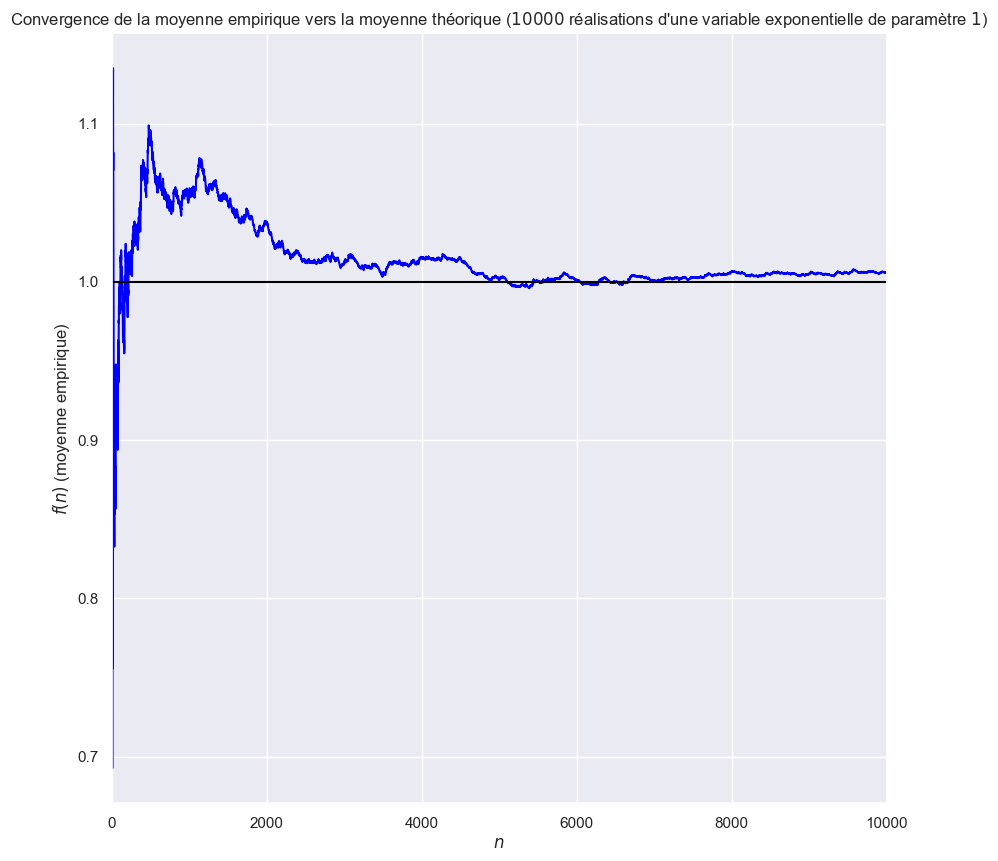

In [16]:
grands_nombres_expo(10000,1)

# Exercice 14

In [2]:
def cauchy(size=1):
    mf = lambda x : np.tan(np.pi*(x-0.5))
    alea = random.random(size)
    return mf(alea)

In [4]:
cauchy(20)

array([ 3.18449341e-01,  5.03216031e-01,  1.08822923e+00, -5.48476688e-01,
       -2.54337778e+00, -1.06628676e+00,  7.45514933e-01,  4.89151301e-01,
       -1.99883094e+00,  1.81133202e-01, -1.41110575e-01,  2.93907832e+02,
        1.28014769e+00,  1.47028051e-02, -4.12253597e-01,  1.51814823e+00,
       -2.68120872e+00, -1.74995769e-01, -4.44326266e+00, -3.37789111e+00])

In [5]:
def test_cauchy(N):
    alea = cauchy(N)
    fig, ax = plt.subplots(figsize=(10,10))
    f = np.cumsum(alea) * np.array([1/i for i in range(1,N+1)])
    ax.plot(range(1,N+1), f, color="blue")
    ax.set_xlabel("$n$")
    ax.set_ylabel("$f(n)$ (moyenne empirique)")
    ax.set_xlim([0,N])
    ax.set_title(f"Moyennes empiriques de variables de Cauchy (échantillon de taille ${N}$)")
    plt.show()

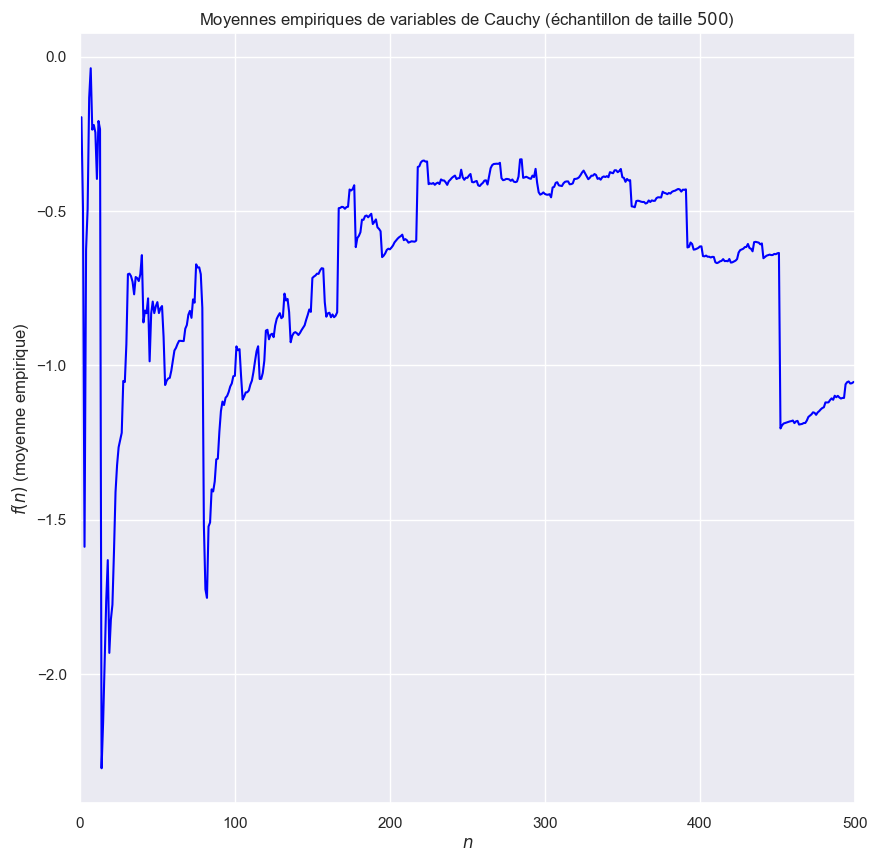

In [6]:
test_cauchy(500)

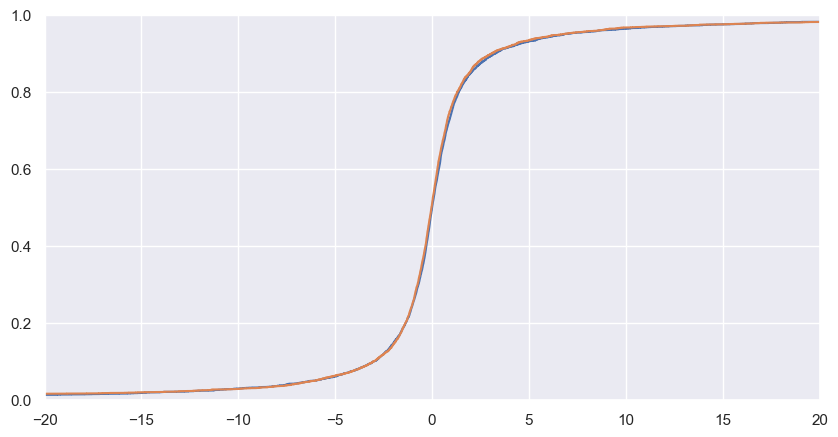

In [8]:
def moyenne_cauchy(n):
    return np.sum(cauchy(n))/n

def loi_empirique_moyenne_cauchy(N, n):
    fig, ax = plt.subplots(figsize=(10,5))
    for nn in n:
        ax.ecdf([moyenne_cauchy(nn) for i in range(N)])
    ax.set_xlim([-20,20])    
    plt.plot()
    
loi_empirique_moyenne_cauchy(5000, [1,5])

Object `np.erf` not found.
